In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [12]:
# Load the dataset
df = pd.read_csv("F:/MSc Datascience/second Semester/Ai and application/boston_housing/housing.csv")
print(df.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [13]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [14]:
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [15]:
print(df.isnull().sum())



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


C:\Users\okagg\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


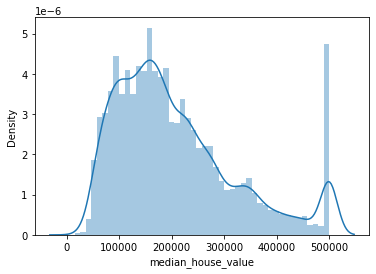

In [16]:
# Plot the distribution of target variable
sns.distplot(df['median_house_value'])
plt.show()



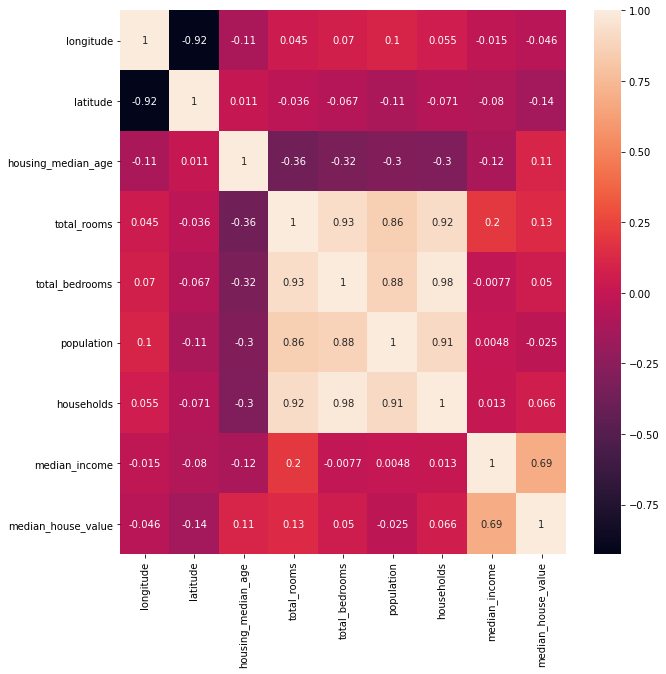

In [17]:
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()




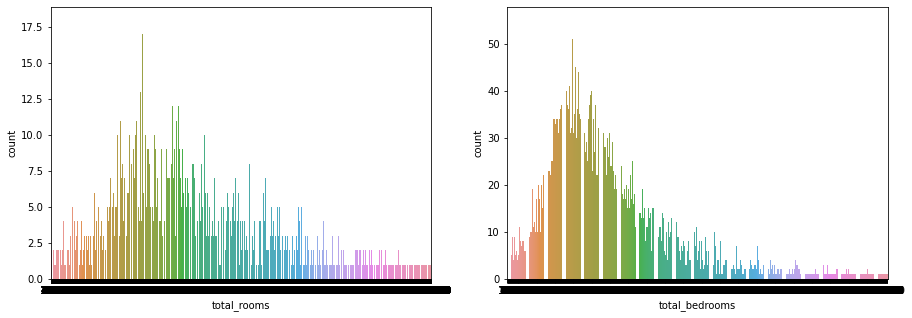

In [18]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x=df['total_rooms']);
fig.add_subplot(1, 2, 2)
sns.countplot(x=df['total_bedrooms']);



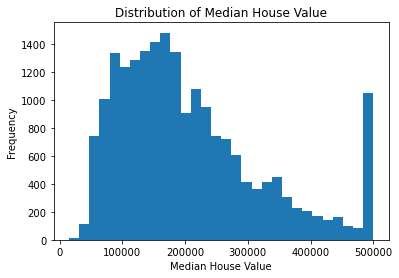

In [27]:
plt.hist(df['median_house_value'], bins=30)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

In [19]:
# Preprocess the data
df = df.dropna()
df['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN','INLAND','ISLAND','NEAR OCEAN'],
                        [0, 1, 2, 3, 4], inplace=True)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print("Before ----------------------------------------------------------------------------------")
print(X)




Before ----------------------------------------------------------------------------------
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37               

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Define the models
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Evaluate the models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {score:.2f}")
    print('R2 score:', score)

Linear Regression MSE: 4920645098.06
R2 score: 4920645098.057757
Ridge MSE: 4920724347.96
R2 score: 4920724347.959701
Lasso MSE: 4920680283.59
R2 score: 4920680283.59104
KNN MSE: 3883289587.05
R2 score: 3883289587.0542502
SVM MSE: 14357242904.58
R2 score: 14357242904.577694
Decision Tree MSE: 4750690184.87
R2 score: 4750690184.873502
Random Forest MSE: 2460807575.97
R2 score: 2460807575.9652267
Gradient Boosting MSE: 3157543962.17
R2 score: 3157543962.165063


In [22]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [23]:
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(f"Best model MSE 'Random forest': {score:.2f}")
print('R2 score:', score)

Best model MSE 'Random forest': 2451862310.29
R2 score: 2451862310.287261


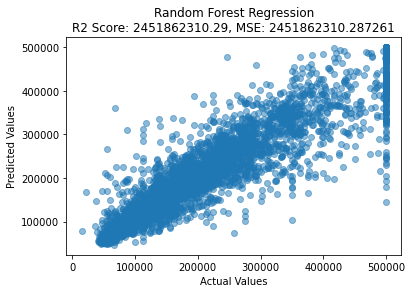

In [26]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Random Forest Regression\nR2 Score: {score:.2f}, MSE: {score}")
plt.show()